In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.signal import find_peaks,peak_widths
from skimage import exposure
from skimage.restoration import denoise_tv_chambolle,estimate_sigma

([], <a list of 0 Text yticklabel objects>)

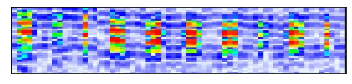

In [115]:
npImage=np.array(Image.open("C:/Users/Varun Makdani/Desktop/Python Prac/Image Learning/Ultra Sonic/sample 2_cropped.JPG"))#.convert("L"))
plt.imshow(npImage,cmap ="gray")
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

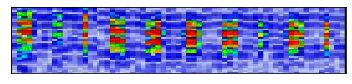

In [116]:
image_equalized = exposure.equalize_hist(npImage)

plt.imshow(image_equalized, cmap="gray",interpolation="nearest")
plt.xticks([])
plt.yticks([])

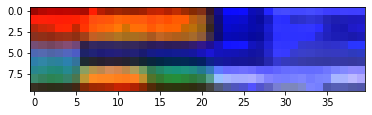

In [140]:
row = image_equalized[50:250]
plt.imshow(row[70:80,10:50], cmap="gray",interpolation="nearest")


In [142]:
print(row[70,10])
print("-----------------")
print(row[70,50])

[0.61420929 0.02760932 0.01090542]
-----------------
[0.23581964 0.25642189 1.        ]



46560


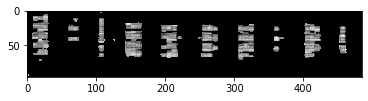

In [117]:
a = np.empty(shape = (1,image_equalized.shape[1],1),dtype=int)

print()
arraylist = list(np.reshape(image_equalized,newshape = (image_equalized.shape[0] * image_equalized.shape[1],3)))
c = []
for val in arraylist:
     if(val[1] > val[2] or val[0] > val[2]):
         c.append(255 * np.sqrt(np.power(val[1],2) +np.power(val[0],2)))
     else:
        c.append(0)
         
print(len(c))

final = np.array(c)
reshapedFinal = np.reshape(final,newshape = (image_equalized.shape[0],image_equalized.shape[1]))

plt.imshow(reshapedFinal,cmap='gray',interpolation="nearest")

#imageArray = np.reshape(arraylist,newshape=image_equalized.shape)


[[  2   1   0 ...   2  52 190]
 [  2   1   0 ...   2  52 190]
 [  2   1   0 ...   2  52 190]
 ...
 [  3   2   2 ...   2  52 190]
 [  4   3   2 ...   2  52 190]
 [  5   4   3 ...   2  52 190]]


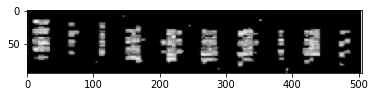

In [86]:
croppedImage = np.array(Image.open("C:/Users/Varun Makdani/Desktop/Python Prac/Image Learning/Ultra Sonic/gray_scale_cropped.JPG").convert("L"))
print(croppedImage)
plt.imshow(croppedImage,cmap='gray',interpolation="nearest")

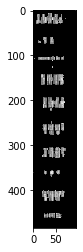

In [118]:
image_equalized_rotated = np.transpose(reshapedFinal)
plt.imshow(image_equalized_rotated,cmap='gray',interpolation="nearest")

In [119]:
middle_col_image_index = (int) (image_equalized_rotated.shape[1]/2)
print(middle_col_image_index)

48


In [120]:
middle_col_img = np.array(image_equalized_rotated[:,middle_col_image_index-10:middle_col_image_index+10])

plt.imshow(middle_col_img,cmap="gray",interpolation="nearest")
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

In [122]:
middle_col_img_avg = np.average(middle_col_img,axis=1)
max_value = np.max(middle_col_img_avg)
peaks = find_peaks(middle_col_img_avg,height=(50,max_value),distance=17,prominence=12)
graph_widths = peak_widths(middle_col_img_avg, peaks[0], rel_height=0.4)

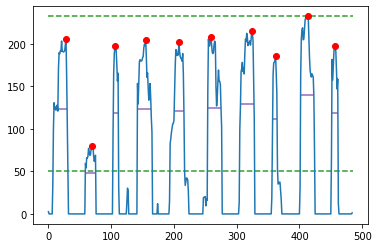

In [123]:
plt.plot(middle_col_img_avg)
plt.hlines(max_value,0,middle_col_img_avg.shape[0],colors="C2",linestyles="dashed")
plt.hlines(50,0,middle_col_img_avg.shape[0],colors="C2",linestyles="dashed")
plt.hlines(*graph_widths[1:], color="C4")
plt.plot(peaks[0],middle_col_img_avg[peaks[0]],'ro')

[23.  14.6 20.2 25.8 22.9 25.8 26.5 18.9 27.7 20.7]
22.609999999999996


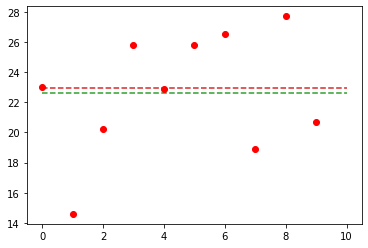

In [124]:
plot_widths_squared = 0.56* graph_widths[0] * graph_widths[0]
plot_heights_squared = 0.06 * (middle_col_img_avg[peaks[0]] - graph_widths[1]) * (middle_col_img_avg[peaks[0]]-graph_widths[1])
#print(middle_col_img_avg[peaks[0]])
#print(graph_widths[1])
plot_width_height_regularised = np.sqrt(plot_widths_squared + plot_heights_squared)
np.around(plot_width_height_regularised,decimals=1,out = plot_width_height_regularised)

print(plot_width_height_regularised)
plot_width_height_regularised_avg = np.average(plot_width_height_regularised)



print(plot_width_height_regularised_avg)

plt.hlines(plot_width_height_regularised_avg,0,len(plot_width_height_regularised),colors="C2",linestyles="dashed")
plt.hlines(np.median(plot_width_height_regularised),0,len(plot_width_height_regularised),colors="C3",linestyles="dashed")
plt.plot(plot_width_height_regularised,'ro')

In [ ]:
def difference()

In [125]:
code = np.array(())
for plot_w_h in plot_width_height_regularised:
    if((plot_w_h  - plot_width_height_regularised_avg) < 0.1):
        code = np.append(code,0)
    else:
        code = np.append(code,1)
print(code.astype(int))

[1 0 0 1 1 1 1 0 1 0]
